# <span style="color:#336699">Introduction to the Web Crop Phenology Metrics Service (WCPMS)</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: June 14, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the WCPMS service to extract phenology metrics from <em>Earth Observation Data Cubes</em>.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Sansigolo, G.; Queiroz, G. R.; Ferreira, K. R.; Adami, M.; Körting, T.<a href="http://www.google.com" target="_blank">A Web Service for Crop Sowing and Harvesting Detection from Earth Observation Data Cubes.
    </div>
</div>

# Introduction
<hr style="border:1px solid #0077b9;">

The Web Crop Phenology Metrics Service (WCPMS) is an web service for calculating phenological metrics based on Phenolopy library and EO Data from the Brazil Data Cube (BDC). It will allow analysts to calculate phenological metrics from data cubes without downloading big EO datasets to their personal computers.

The software run on the server side, so it doesn’t require package installation. Through a simple API, analysts indicate a spatial location or region and the WCPMS will retrieve the phenological metrics associated with spatial locations by calculating it using time series. 

The WCPMS is a web service, and it can be accessed through its API. To facilitate these operations, we have developed an official client—a simple Python library. The WCPMS Client is composed of a group of functions, the main ones are:

- ``get_collections``: returns in list format the unique identifier of each of the data cubes available in the BDC’s SpatioTemporal Asset Catalogs (STAC).

- ``get_description``: returns in dictionary format the information on each of the phenology metrics, such as code, name, description and method. 	

- ``get_phenometrics``: returns in dictionary form all the phenological metrics calculated for the given spatial location.

- ``get_phenometrics_region``: returns in list form dictionary with the phenological metrics calculated for each of the given spatial location based on selected region methodology (all, systematic grid or random grid).

This Jupyter Notebook shows how to use WCPMS in Python.

## Web Service
<hr style="border:1px solid #0077b9;">

The architecture of the proposed web service is made up of two sides: (1) the server-side and (2) the client-side. It will allow analysts to calculate phenological metrics from data cubes with no need to download big EO datasets to their personal computers. 

The web service runs on the server-side, so everything related to it, such as the libraries for calculating phenological metrics, the access to the web service for extracting time series (WTSS), is on the cloud, so it doesn’t require any package installation. 

<div align="center">
    <figcaption><strong>Figure 1</strong> - Architecture of the web service for phenological metrics extraction </figcaption>
    <img src="https://github.com/GSansigolo/wcpms.py/blob/master/docs/sphinx/img/wcpms_architecture.png?raw=true" align="center" width="768"/>
    <br>
</div>


# Python Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [WCPMS client for Python](https://github.com/brazil-data-cube/wcpms.py). To install it from PyPI using `pip`, use the following command:

In [1]:
!pip install git+https://github.com/brazil-data-cube/wcpms.py

  Cloning https://github.com/brazil-data-cube/wcpms.py to /private/var/folders/2b/3r28ml1d7yj3ltn73r94__hr0000gn/T/pip-req-build-bhujt_99
  Running command git clone --filter=blob:none --quiet https://github.com/brazil-data-cube/wcpms.py /private/var/folders/2b/3r28ml1d7yj3ltn73r94__hr0000gn/T/pip-req-build-bhujt_99
  Resolved https://github.com/brazil-data-cube/wcpms.py to commit c586991d20e0b50f1a8abe04cbb52e96e9677140
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In order to access the funcionalities of the client API, you should import the `wcpms` package, as follows:

In [2]:
from wcpms import *

After that, you should add the `wcpms` service url:

In [3]:
wcpms_url = 'https://data.inpe.br/bdc/wcpms' 

The above cell will create an string named `service` that will save the wcpms url for future use.

# Select Data Cube
<hr style="border:1px solid #0077b9;">

Before creating a data cube query, it is important to select a data cubes from the BDC catalog. It is possible to retrive a list with avaliable data cubes with the `get_collections` function:

In [4]:
colections=get_collections(
    url = wcpms_url
)

colections

['CBERS4-MUX-2M-1',
 'CBERS4-WFI-16D-2',
 'CBERS-WFI-8D-1',
 'LANDSAT-16D-1',
 'mod13q1-6.1',
 'myd13q1-6.1',
 'S2-16D-2']

# Creating a Data Cube Query
<hr style="border:1px solid #0077b9;">

To make it easier to use, there is a function to create a data cube query called `cube_query`:

In [5]:
datacube=cube_query(
    collection="S2-16D-2",
    start_date='2021-07-01',
    end_date='2022-09-30',
    freq='16D',
    band="NDVI"
)

The above cell will create an object named `datacube` that saves the desire BDC data cube (`S2-16D-2`).

# Retrieving the Phenological Metrics
<hr style="border:1px solid #0077b9;">

In order to retrieve the phenological metrics associated with spatial locations by calculating it using time series `NDVI`, in the location of `latitude -29.202633381242652` and `longitude -55.95542907714844 ` from `January 1st, 2022` to `December 31st, 2022`, use the `get_phenometrics` function:

In [6]:
pm=get_phenometrics(
    url=wcpms_url,
    cube=datacube,
    latitude=-25.592490962446583, longitude=-49.73770333462285
)

In [7]:
pm['phenometrics']

{'aos_v': 7071.99951171875,
 'bse_v': 2099.0,
 'eos_t': '2022-11-18T00:00:00',
 'eos_v': 2537.333251953125,
 'lios_v': 56102.0,
 'liot_v': 90104.1640625,
 'los_v': 128.0,
 'mos_v': 8584.4453125,
 'pos_t': '2022-09-15T00:00:00',
 'pos_v': 8903.3330078125,
 'rod_v': 99.46875,
 'roi_v': 89.19270324707031,
 'sios_v': 39620.0,
 'siot_v': 49814.8359375,
 'sos_t': '2022-07-13T00:00:00',
 'sos_v': 3195.0,
 'vos_t': '2022-02-19T00:00:00',
 'vos_v': 1831.3333740234375}

Each phenological metric can be accessed by the code

In [8]:
pm['phenometrics']['sos_t']

'2022-07-13T00:00:00'

In [9]:
pm['phenometrics']['eos_t']

'2022-11-18T00:00:00'

It is also possible to access the time points associated to the values:

In [10]:
pm['timeseries']['timeline']

['2022-01-01',
 '2022-01-17',
 '2022-02-02',
 '2022-02-18',
 '2022-03-06',
 '2022-03-22',
 '2022-04-07',
 '2022-04-23',
 '2022-05-09',
 '2022-05-25',
 '2022-06-10',
 '2022-06-26',
 '2022-07-12',
 '2022-07-28',
 '2022-08-13',
 '2022-08-29',
 '2022-09-14',
 '2022-09-30',
 '2022-10-16',
 '2022-11-01',
 '2022-11-17',
 '2022-12-03',
 '2022-12-19']

# Visualizing the Time Series with Phenological Metrics in Matplotlib
<hr style="border:1px solid #0077b9;">

If you have Matplotlib and Numpy installed, it is possible to plot the time series with the `plot_phenometrics` function:

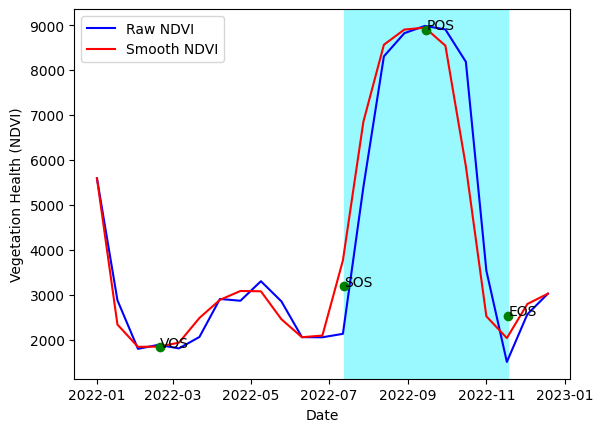

In [11]:
plot_phenometrics(datacube, pm)

# Retrieve Description
<hr style="border:1px solid #0077b9;">

Once you start using wcpms to extract phenology metrics, the information about each metric becomes very important. To help you with that, we provide a complete description of all the metrics provided by the service. It is possible to plot a table with all the descriptions with the `get_description` function:

In [12]:
description=get_description(
    url = wcpms_url
)

description

Code,Name,Description,Method,Value,Time
POS,Peak of Season,Highest vegetation value and time of season.,Maximum value in a timeseries.,True,True
MOS,Middle of Season,Mean vegetation value and time of values in top 80 of season.,"Mean value and time where the left and right slope edges have increased and decreased to the 80 level of the season, respectively.",True,False
VOS,Valley of Season,Lowest vegetation value and time of season.,Minimum value in a timeseries.,True,True
BSE,Base,Mean of the lowest vegetation values in season.,Mean value of the lowest vegetation values to the left and right of Peak of Season.,True,False
SOS,Start of Season,Vegetation value and time at the start of season.,Six methods available: 1) seasonal amplitude; 2) absolute amplitude; 3) Relative amplitude; 4) LOESS STL Trend line; 5) First value of positive slope; and 6) Median value of positive slope.,True,True
EOS,End of season,Vegetation value and time at the end of season.,Six methods available: 1) seasonal amplitude; 2) absolute amplitude; 3) Relative amplitude; 4) LOESS STL Trend line; 5) First value of negative slope; and 6) Median value of negative slope.,True,True
LOS,Length of Season,Length of time (number of days) between the start and end of season.,The day of year at SOS minus EOS.,False,True
ROI,Rate of Increase,The rate of vegetation 'green up' at the beginning of season.,Calculated as the ratio of the difference between the left 20 and 80 levels and the corresponding time difference.,True,False
ROD,Rate of Decrease,The rate of vegetation 'green down' at the end of season.,Calculated as the ratio of the difference between the right 20 and 80 levels and the corresponding time difference.,True,False
AOS,Amplitude of Season,The amplitude of vegetation values for season.,The difference between the maximum value and the VOS/BSE value.,True,False


# References
<hr style="border:1px solid #0077b9;">

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [WTSS Examples](./wtss-examples.ipynb)